In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = 'cleaned_df.csv'
df = pd.read_csv(data)

#display the first 5 rows of the dataframe and the general information about the dataframe
df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138 entries, 0 to 2137
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unitid                 2138 non-null   int64  
 1   retention_rate         2138 non-null   float64
 2   sat_crit_read_75_pctl  2138 non-null   float64
 3   sat_math_75_pctl       2138 non-null   float64
 4   tuition_type           2138 non-null   int64  
 5   tuition_fees_ft        2138 non-null   float64
 6   state_abbr             2138 non-null   object 
 7   inst_name              2138 non-null   object 
 8   completion_rate_6yr    2138 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 150.5+ KB


(   unitid  retention_rate  sat_crit_read_75_pctl  sat_math_75_pctl  \
 0  100654            0.54                  520.0             500.0   
 1  100654            0.54                  520.0             500.0   
 2  100663            0.86                  668.0             660.0   
 3  100663            0.86                  668.0             660.0   
 4  100706            0.81                  700.0             730.0   
 
    tuition_type  tuition_fees_ft state_abbr  \
 0             3          10024.0         AL   
 1             4          18634.0         AL   
 2             3           8568.0         AL   
 3             4          20400.0         AL   
 4             3          11338.0         AL   
 
                              inst_name  completion_rate_6yr  
 0             Alabama A & M University                 0.30  
 1             Alabama A & M University                 0.30  
 2  University of Alabama at Birmingham                 0.56  
 3  University of Alabama at B

/Users/atomar/opt/anaconda3/envs/CSE_6242/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/atomar/opt/anaconda3/envs/CSE_6242/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/atomar/opt/anaconda3/envs/CSE_6242/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/atomar/opt/anaconda3/envs/CSE_6242/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

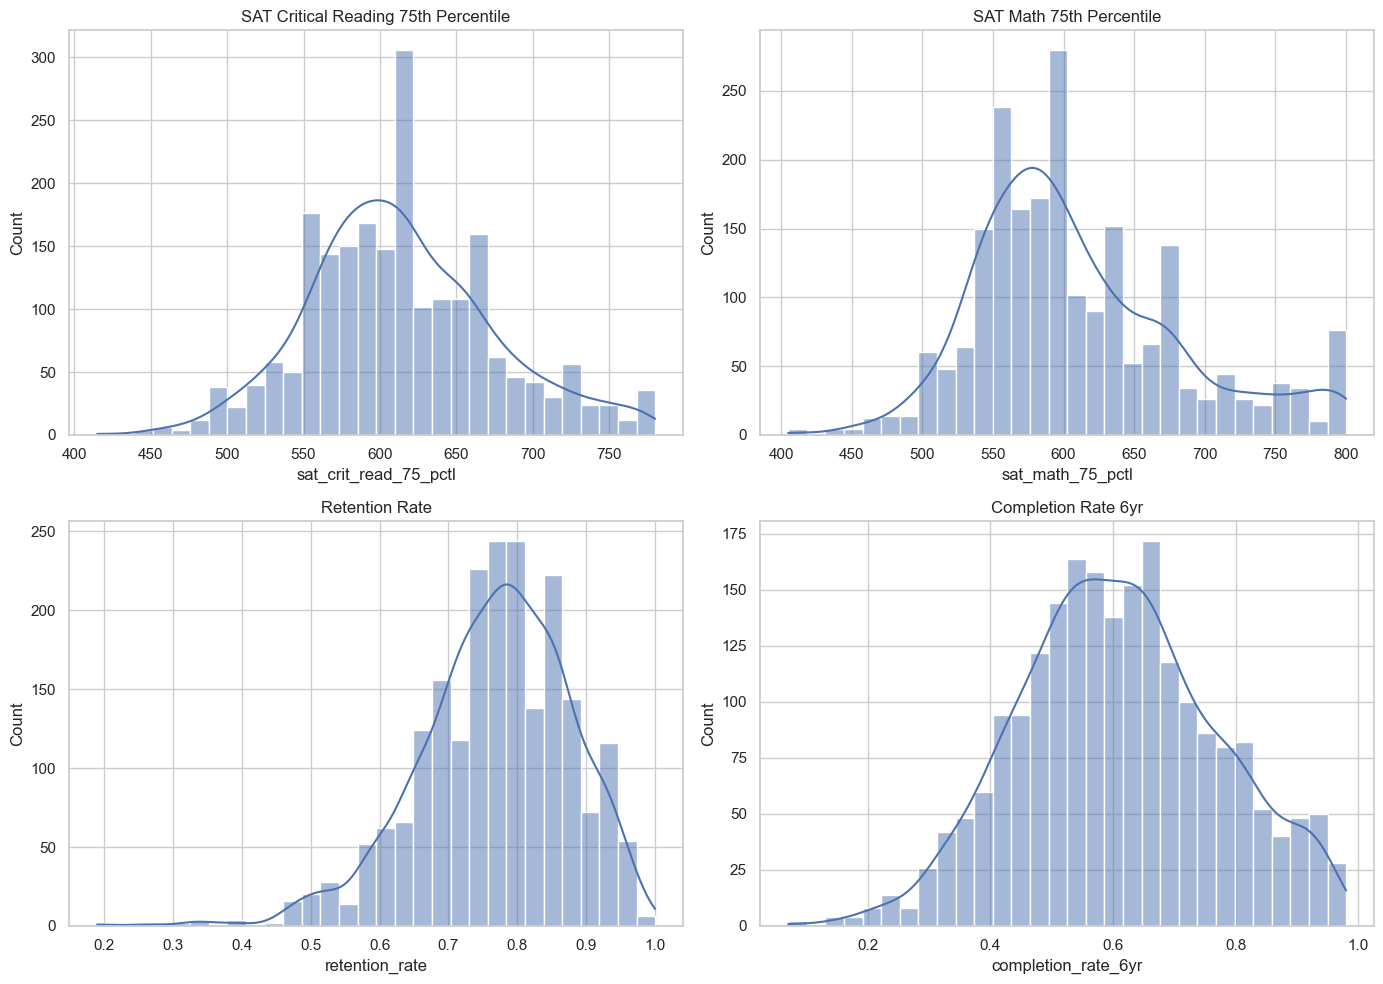

In [3]:
#setting up the style for the plots
sns.set_theme(style='whitegrid')

#creating the boxplot to hold multiple subplots
fig,axes = plt.subplots(2,2,figsize=(14,10))

#plotting the histogram plots
sns.histplot(df['sat_crit_read_75_pctl'],bins=30,kde=True,ax=axes[0,0])
axes[0,0].set_title('SAT Critical Reading 75th Percentile')
sns.histplot(df['sat_math_75_pctl'],bins=30,kde=True,ax=axes[0,1])
axes[0,1].set_title('SAT Math 75th Percentile')
sns.histplot(df['retention_rate'],bins=30,kde=True,ax=axes[1,0])
axes[1,0].set_title('Retention Rate')
sns.histplot(df['completion_rate_6yr'],bins=30,kde=True,ax=axes[1,1])
axes[1,1].set_title('Completion Rate 6yr')

plt.tight_layout()
plt.show()

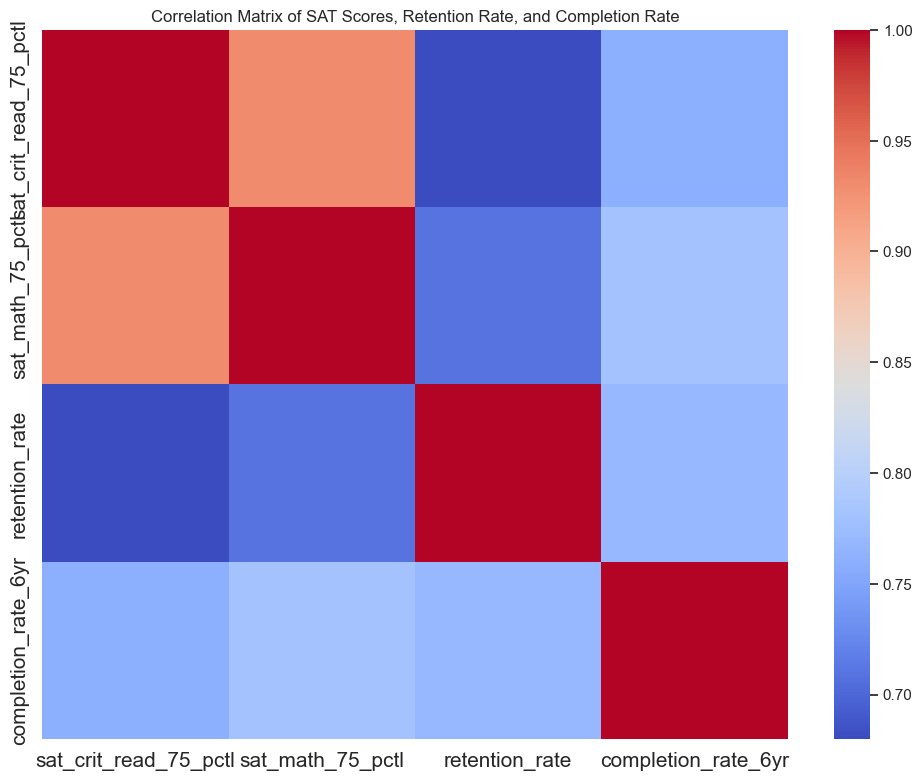

In [4]:
plt.subplots(figsize=(10,8))
corr_matrix = df[['sat_crit_read_75_pctl', 'sat_math_75_pctl', 'retention_rate', 'completion_rate_6yr']].corr()
corr_matrix=corr_matrix.round(2)

sns.heatmap(corr_matrix,cmap='coolwarm',annot_kws={'size': 15})
plt.title('Correlation Matrix of SAT Scores, Retention Rate, and Completion Rate')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

In [5]:
corr_matrix

,sat_crit_read_75_pctl,sat_math_75_pctl,retention_rate,completion_rate_6yr
sat_crit_read_75_pctl,1.00,0.93,0.68,0.76
sat_math_75_pctl,0.93,1.00,0.71,0.78
retention_rate,0.68,0.71,1.00,0.77
completion_rate_6yr,0.76,0.78,0.77,1.00


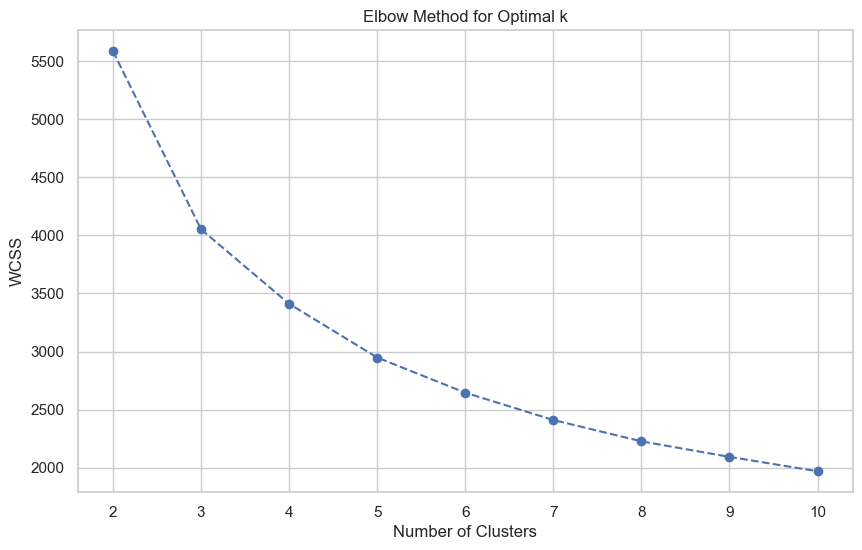

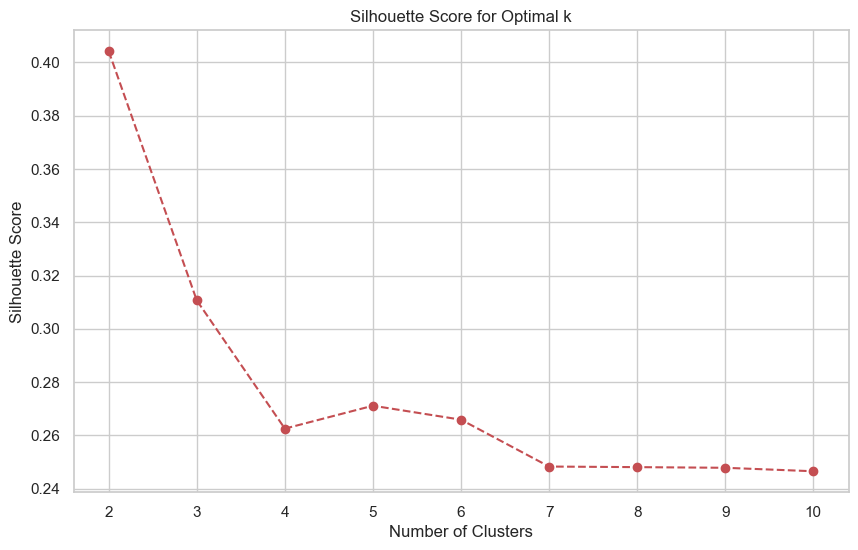

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming 'df' is your pre-loaded DataFrame containing the university data
# selecting the features for clustering
numeric_features = ['sat_crit_read_75_pctl', 'sat_math_75_pctl', 'retention_rate', 'completion_rate_6yr', 'tuition_fees_ft']

# creating the column transformer without 'state_abbr'
preprocessor = StandardScaler()

# applying the column transformer to the dataframe
features_scaled = preprocessor.fit_transform(df[numeric_features])

# determining the optimal number of clusters using the elbow method
wcss = []
silhouette_scores = []
k_values = range(2, 11)
for i in k_values:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))

# plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='r')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


The Elbow Method suggests an optimal cluster number of 3 due to a noticeable bend, indicating a plateau in variance reduction with more clusters. However, the silhouette score peaks at 2 clusters, showing  the highest level of cluster distinction. While 2 clusters offers the most distinct segmentation, 3 clusters provide more nuanced understanding of the dataset. 

In [13]:
# Create a pipeline with the preprocessor and KMeans
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('clusterer', KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42))])

# Fit the pipeline to the data
pipeline.fit(df[numeric_features])
df['cluster'] = pipeline.named_steps['clusterer'].labels_

# Defining a function to recommend universities based on a user profile
def recommend_universities(user_profile, pipeline, dataframe, feature_columns):
    user_profile_df = pd.DataFrame([user_profile], columns=feature_columns)
    user_profile_scaled = pipeline.named_steps['preprocessor'].transform(user_profile_df)
    user_cluster = pipeline.named_steps['clusterer'].predict(user_profile_scaled)
    
    # Filter universities in the same cluster
    cluster_universities = dataframe[dataframe['cluster'] == user_cluster[0]]
    
    # Calculate the distance from each university to the user profile
    distances = pipeline.named_steps['clusterer'].transform(cluster_universities[feature_columns])
    min_distance = distances.min(axis=1)
    max_distance = distances.max(axis=1)

    similarity_scores = 1 - (min_distance / max_distance)
    # Assign the distances to the DataFrame and calculate similarity score
    cluster_universities = cluster_universities.assign(similarity_score=similarity_scores)

    
    # Sort by similarity score
    sorted_universities = cluster_universities.sort_values('similarity_score', ascending=False)
    
    # Drop duplicates and keep the first instance
    unique_sorted_universities = sorted_universities.drop_duplicates(subset='inst_name', keep='first')
    
    return unique_sorted_universities[['inst_name', 'state_abbr'] + feature_columns + ['similarity_score']]

# Define the hypothetical user profile
user_profile = {
    'sat_crit_read_75_pctl': 740,
    'sat_math_75_pctl': 720,
    'retention_rate': 1.0,
    'completion_rate_6yr': 0.90,
    'tuition_fees_ft': 14000
}

# Get all unique recommendations for the hypothetical user profile
all_recommendations = recommend_universities(user_profile, pipeline, df, numeric_features)

# Specify the state for sorting and apply the filter
priority_state = 'CA'
state_recommendations = all_recommendations[all_recommendations['state_abbr'] == priority_state]

# Display the top N recommendations for the specified state
num_universities = 10  # The number of universities to display
display_recommendations = state_recommendations.head(num_universities)
display_recommendations

/Users/atomar/opt/anaconda3/envs/CSE_6242/lib/python3.12/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


,inst_name,state_abbr,sat_crit_read_75_pctl,sat_math_75_pctl,retention_rate,completion_rate_6yr,tuition_fees_ft,similarity_score
82,California Polytechnic State University-San Lu...,CA,690.0,720.0,0.94,0.83,10071.0,0.000221
106,University of California-Irvine,CA,680.0,750.0,0.94,0.86,13753.0,0.000156
102,University of California-Berkeley,CA,740.0,790.0,0.96,0.93,14312.0,0.000151
112,University of California-Santa Barbara,CA,710.0,750.0,0.91,0.85,14406.0,0.000149
110,University of California-San Diego,CA,710.0,770.0,0.94,0.88,14648.0,0.000146
104,University of California-Davis,CA,670.0,730.0,0.93,0.88,14597.0,0.000146
182,Thomas Aquinas College,CA,720.0,660.0,0.93,0.80,26000.0,0.000078
2069,Soka University of America,CA,650.0,760.0,0.92,0.89,33962.0,0.000059
109,University of California-Riverside,CA,630.0,650.0,0.91,0.79,43613.0,0.000045
115,University of California-Santa Cruz,CA,670.0,690.0,0.85,0.78,43779.0,0.000045
